# Intro

Some last things to verify real quick

- Does my exclusion of z-migration matter?
- Chabrier IMF and friends
- complete analytic and alternate model fagb exploration
- mass shift for other models
- more extreme SFH
- last 

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import pandas as pd

In [2]:
import vice

import surp
from surp import subgiants
from surp import gce_math as gcem

import arya
arya.style.set_size((10/3, 10/3))
from arya import COLORS

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
def find_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the csv summary
    """
    
    file_name = "../models/" + name + "/stars.csv"
    model =  pd.read_csv(file_name, index_col=0)
    return model

In [4]:
def to_nice_name(apogee_name):
    name = apogee_name.replace("_", "/").title()
    name = f"[{name}]"
    return name

In [5]:
data_kwargs = dict(
    color="k", 
    stat="median",
    err_kwargs=dict(facecolor="k", alpha=0.3)
)

model_kwargs = dict(
    stat="median", errorbar=None,
    aes="line"
)


def zooh_models(models, labels,x="MG_H", y="C_MG", use_true=True, sequential=False, filt_ha=True, **kwargs):
    kwargs = dict(numbins=20, **kwargs)
    
    N = len(models)
    
    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end
        
    if use_true:
        xm=x + "_true"
        ym=y+ "_true"
    else:
        xm = x
        ym = y
    for i in range(N):
        name = labels[i]
        model = models[i]
        if filt_ha:
            df = surp.filter_high_alpha(model)
        else:
            df = model
        color = hm(i)
            
        arya.medianplot(df, xm, ym, label=name, color=color, **model_kwargs, **kwargs)
    # end

    if filt_ha:
        df = surp.filter_high_alpha(subgiants)
    else:
        df = subgiants
        
    arya.medianplot(df, x=x, y=y, zorder=-2, **data_kwargs, **kwargs)
    plt.xlabel(to_nice_name(x))
    plt.ylabel(to_nice_name(y))
    

# end


    
def zofeo_models(models, labels, x="MG_FE", y="C_MG", use_true=True, sequential=False, mg_0=-0.0, w=0.025, **kwargs):
    kwargs = dict(numbins=12, x=x, y=y, **kwargs)
    df = surp.filter_metallicity(subgiants, c=mg_0, w=w)

    arya.medianplot(df, **data_kwargs, **kwargs)
    
    N = len(models)
    if use_true:
        kwargs["x"] = x + "_true"
        kwargs["y"] = y+ "_true"

    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end    
    
    for i in range(N):
        model = models[i]
        df = surp.filter_metallicity(model, c=mg_0, w=w)
        color = hm(i)

        arya.medianplot(df, label=labels[i], color=color, **model_kwargs, **kwargs)
    plt.xlabel(to_nice_name(x))
    plt.ylabel(to_nice_name(y))
    

#

In [6]:
def names_to_models(names):
    return [find_model(name) for name in names]

In [7]:
def compare_cooh(names, labels, ylim=None, legend=True, **kwargs):
    models = names_to_models(names)
    zooh_models(models, labels,legend=legend, **kwargs)
    if legend:
        arya.Legend(color_only=True)
    
    if ylim is not None:
        plt.ylim(ylim)
    else:
        plt.ylim(-0.24, 0.04)
        plt.yticks(np.arange(-0.2, 0.02, 0.05))
    # end if
    
    plt.xlim(-0.45, 0.35)

In [8]:
def compare_coofe(names, labels, legend=True, ylim=None, **kwargs):
    models = names_to_models(names)
    zofeo_models(models, labels, legend=legend, **kwargs)
    if legend:
        arya.Legend(color_only=True)

    plt.xlim(0, 0.3)


In [9]:
def compare(names, labels=None, axs=None, **kwargs):
    if labels is None:
        labels = names
        
    if axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex="col", sharey=True,  gridspec_kw={"wspace": 0, "hspace": 0})
    # end
        
    plt.sca(axs[0])
    compare_cooh(names, labels, **kwargs, legend=False)
    
    plt.sca(axs[1])
    compare_coofe(names, labels, legend=False, **kwargs)
    plt.ylabel("")
    arya.Legend(color_only=True)

# end


# Main figures

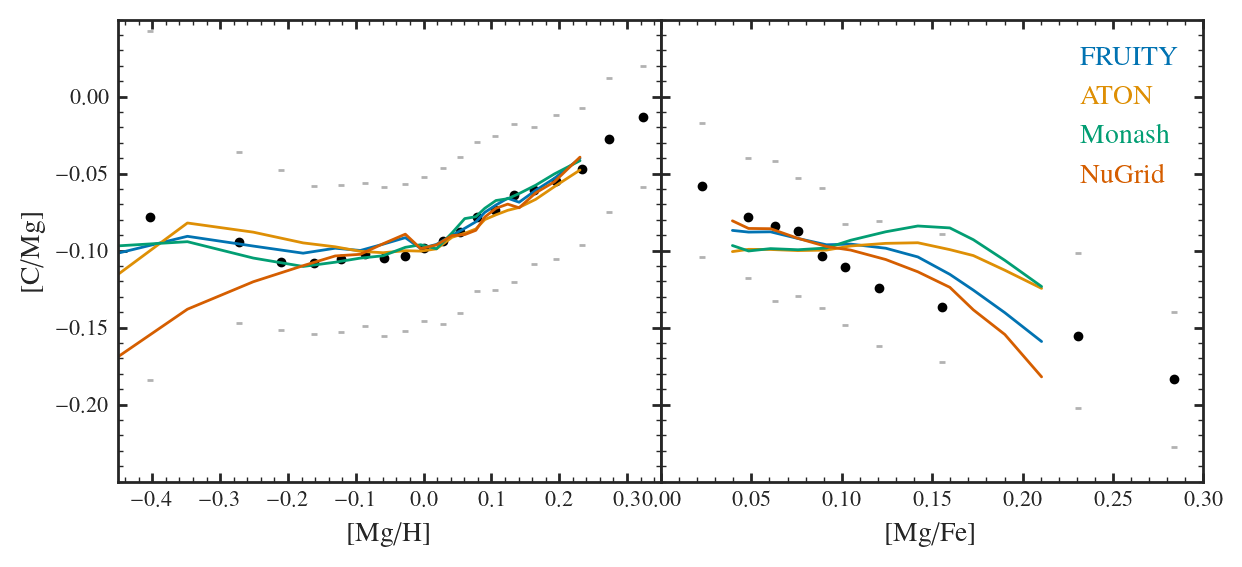

In [10]:
names = [    
    "fiducial/run",
    "aton/best",
    "monash/best",
    "nugrid/best",
  # "analytic/mc_best",
  ]

labels = ["FRUITY", "ATON", "Monash",  "NuGrid"]# "analytic"]

compare(names, labels)
plt.ylim(-0.25, 0.05)
plt.savefig("figures/sims_agb.pdf")

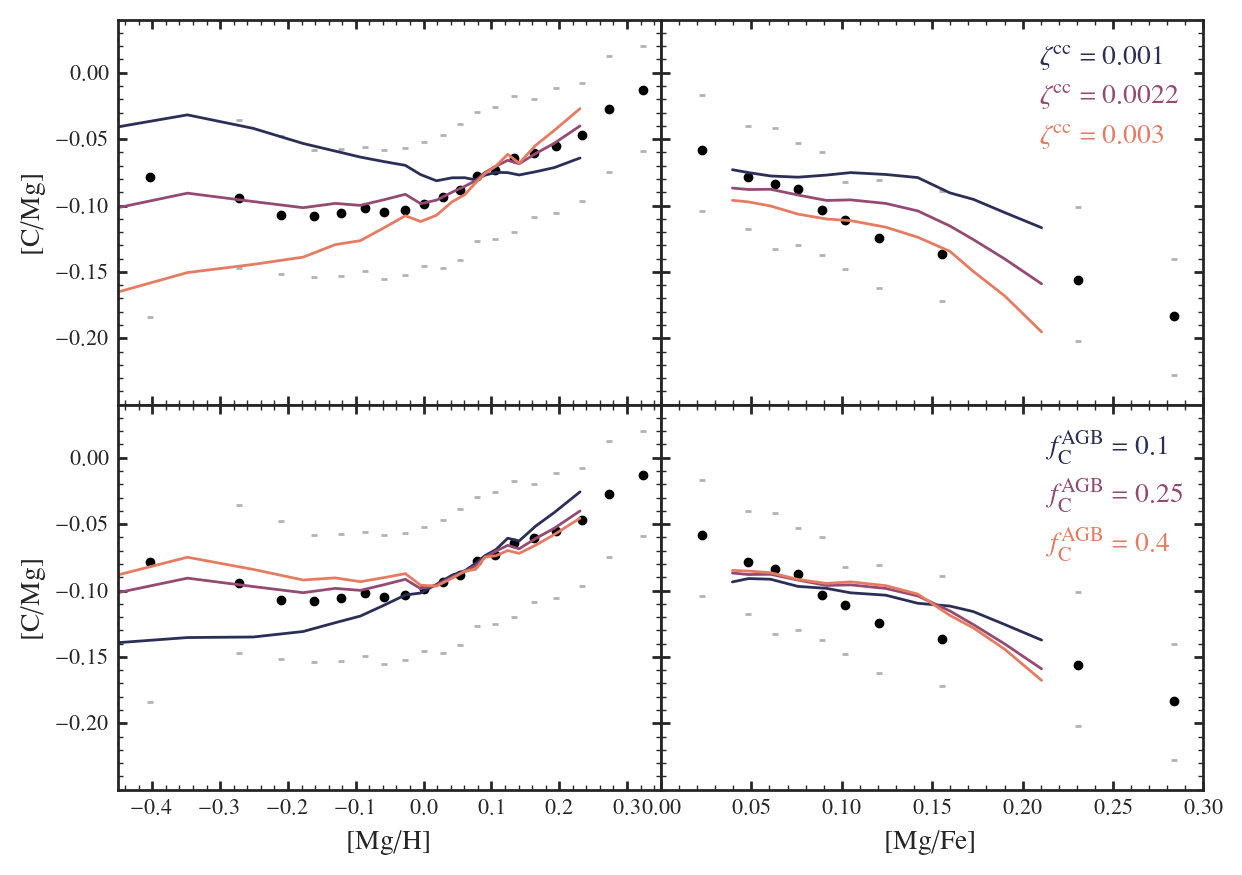

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex="col", sharey=True, gridspec_kw={"wspace": 0, "hspace": 0})


names = [
    "fruity/zeta_lower",
    "fiducial/run",
    "fruity/zeta_higher",
]
labels = [
    r"$\zeta^{\rm cc} = 0.001$", 
    r"$\zeta^{\rm cc} = 0.0022$", 
    r"$\zeta^{\rm cc} = 0.003$"
]

compare(names, labels, axs = axs[0], sequential=True)




names = [    
    "fruity/f_0.1",
    "fiducial/run",
    "fruity/f_0.4",
  ]

labels = [r"$f_{\rm C}^{\rm AGB}=0.1$", r"$f_{\rm C}^{\rm AGB}=0.25$", r"$f_{\rm C}^{\rm AGB}=0.4$",]
compare(names, labels, sequential=True, axs=axs[1])

plt.ylim(-0.25)

plt.savefig("figures/sims_zeta_f.pdf")

In [12]:
names_fz = [   
    "fruity/fz_0.1",
    "fiducial/run",
   # "fruity/alpha_z_higher",
    "fruity/fz_0.4",
  ]

labels_fz = [r"lower f", "fiducial", "higher f"]


names_agbm = [   
    "fruity/agb_mass_0.5",
    "fruity/agb_mass_0.7",
    "fiducial/run",
    "fruity/agb_mass_1.5",
    #"fruity/agb_mass_2",
  ]

labels_agbm = ["0.5", "0.7", "1", "1.5", "2"]


names_sfh = [
    "fiducial/run",
    "fiducial/twoinfall_liam/",
    "fiducial/lateburst",
    "fiducial/eta2",
]
labels_sfh = [
    r"fiducial",  
    r"twoinfall",
    "lateburst",
    r"$y\rightarrow 2y$",
]


FileNotFoundError: [Errno 2] No such file or directory: '../models/fiducial/twoinfall_liam//stars.csv'

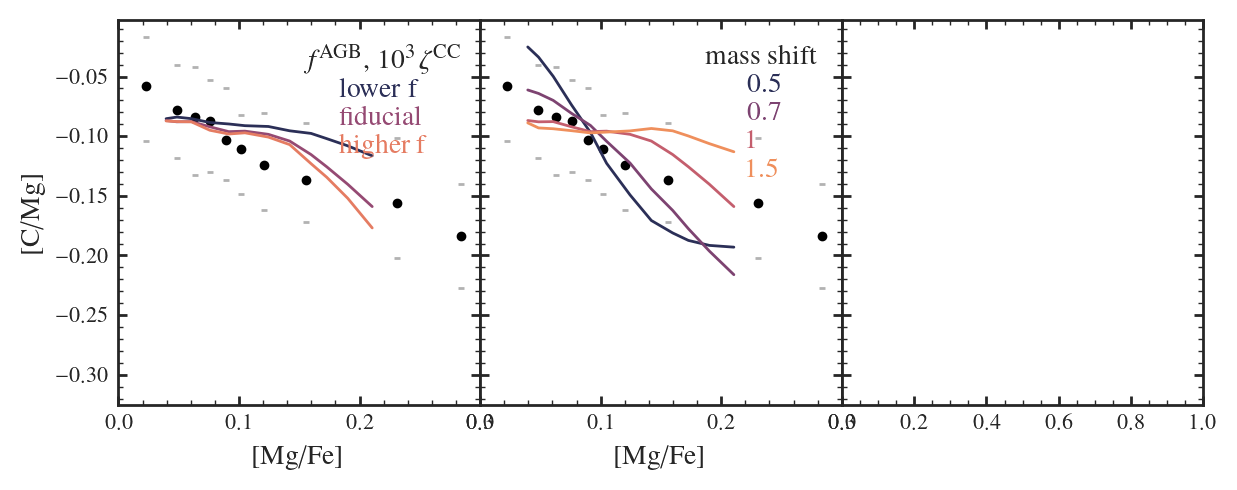

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(7, 2.5), sharex="col", sharey=True, gridspec_kw={"wspace": 0, "hspace": 0})

plt.sca(axs[0])
compare_coofe(names_fz, labels_fz, sequential=True, legend=False)
arya.Legend(loc=1, color_only=True, title=r"$f^{\rm AGB}$, $10^3\,\zeta^{\rm CC}$", labelspacing=0.1)

plt.sca(axs[1])
compare_coofe(names_agbm, labels_agbm, sequential=True, legend=False)
arya.Legend(loc=1, color_only=True, title=r"mass shift", labelspacing=0.1)
plt.ylabel("")

plt.sca(axs[2])
compare_coofe(names_sfh, labels_sfh)
plt.ylabel("")

plt.ylim(-0.25, -0.0)
plt.tight_layout()

plt.savefig("figures/zeta_f_mass_sfh.pdf")

In [ ]:
names = ["fiducial/run"]
labels = ["fiducial"]

compare_cooh(names, labels, y="C_N", ylim=(-0.3, 0.3), legend=False, use_true=False)
plt.savefig("figures/nitrogen.pdf")

In [ ]:
names = [
    "fiducial/run",
    "fruity/cc_BiLogLin",
]
labels = names
compare(names, labels, sequential=True)


# Other models

In [ ]:
compare_coofe(names, labels, y="C_N", use_true=False, ylim=(-0.3, 0.3), legend=False)


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(7, 2.5), sharex="col", sharey=True, gridspec_kw={"wspace": 0, "hspace": 0})

plt.sca(axs[0])
compare_cooh(names_fz, labels_fz, sequential=True)

plt.sca(axs[1])
compare_cooh(names_agbm, labels_agbm, sequential=True)
plt.ylabel("")

plt.sca(axs[2])
compare_cooh(names_sfh, labels_sfh)
plt.ylabel("")

plt.ylim(-0.25, -0.0)
plt.tight_layout()


In [ ]:
names = [
    "fiducial/run",
    "fruity/cc_BiLogLin",
]
labels = names
compare(names, labels, sequential=True)


In [ ]:
names = [
    "fiducial/run",
    "fiducial/sspw_const",
    "fiducial/sspw_lin",
    "fiducial/sspw_peaked",
]
labels = names
compare(names, labels)


In [ ]:
names = [
    "fiducial/run",
    "fruity/f_0.3_ia1.2",
]
labels = names
compare(names, labels, sequential=True)


# Extra fruity

In [ ]:
names = [   
    "fruity/f_0",
    "fruity/f_0.1",
    "fiducial_run",
    "fruity/f_0.5",
    "fruity/f_1",
  ]

labels = names
compare(names, labels, sequential=True)

In [ ]:
names = [   
    "fruity/agb_mass_0.5",
    "fruity/agb_mass_0.8",
    "fiducial_run",
    "fruity/agb_mass_1.5",
    "fruity/agb_mass_2",
  ]

labels = names
compare(names, labels, sequential=True)

In [ ]:
names = [    
    "fruity/fz_0",
    "fruity/fz_0.1",
    "fiducial_run",
    #"fruity/fz_0.3",
    "fruity/fz_0.5",
    #"fruity/f_0.8",
    "fruity/fz_1",
  ]
labels = names
compare(names, labels, sequential=True)

In [ ]:
names = [    
    #"fiducial/run",
    "fruity/agb_lin_interp",
    #"fruity/agb_log_interp"
    "fruity/agb_spline_interp"
  ]

labels = ["C11", "lininterp", "splineint"]

compare(names, labels)


# Aton, Monash & NuGrid

In [ ]:
names = [    
    "fiducial/run",
    "aton/f_0.2",
    "monash/f_0.2",
    #"nugrid/f_0.2",
    #"C11_f0.0"
  ]

labels = ["FRUITY", "ATON", "Monash",  "NuGrid", "CC only"]

compare(names, labels)
plt.ylim(-0.25, 0.05)


In [ ]:
names = [
    "monash/oob",
    "monash/f_0.2",
    "monash/fz_0.1"
]
labels = ["f=0.1", ".2", ".3"]
compare(names, labels, sequential=True)

In [ ]:
names = [
    "aton/oob",
    "aton/f_0.1",
    "aton/f_0.5"
]
labels = ["alpha=1", "2", "3"]
compare(names, labels, sequential=True)

V13 predicts declining yields with metallicity with higher ratios. This is a combination of the steep metallicity dependence and the tendency of the yields to become negative after solar metallicity.

In [ ]:
names = [
    "nugrid/f_0.1",
    "nugrid/f_0.2",
]
labels = ["f=0.1", ".2", ".3", ".4"]
compare(names, labels, sequential=True)

# Other CCSNe Models?

In [ ]:
names = [    
    #"fiducial/run",
    "fruity/cc_LogLin",
    "fruity/cc_Lin",
    "fruity/cc_BiLin",
    "fruity/cc_BiLogLin",
  ]

labels = ["C11", "loglin ", "linear", "bilin", "biloglin"]

compare(names, labels)

In [ ]:
names = [
    "fruity/cc_A_0",
    "fiducial/run",
    "fruity/cc_A_0.5",
]
labels = [
    "0", "0.5", "1", "1.5"
]

compare(names, labels, sequential=True)


In [ ]:
def plot_ycc_model(name, **kwargs):
    m_h = np.linspace(-2, 0.8, 1000)
    Z = gcem.MH_to_Z(m_h)
    
    surp.yields.set_yields(surp.YieldParams.from_file(f"../models/{name}/yield_params.toml"), verbose=False)

    y_c_cc = vice.yields.ccsne.settings["c"]
    y_mg = vice.yields.ccsne.settings["mg"]

    y = [y_c_cc(z) for z in Z]
    plt.plot(m_h, y, **kwargs)

In [ ]:
surp.yields.set_yields(surp.YieldParams.from_file(f"../models/fruity/yield_params.toml"))

In [ ]:
plot_ycc_model("fruity/cc_Lin", label="linear")
plot_ycc_model("fruity/", label="log quadratic")
plot_ycc_model("fruity/cc_LogLin", label="log lin")
plot_ycc_model("fruity/cc_BiLogLin", label="log lin with min (fiducial)")

plt.xlabel(r"$\log Z / Z_\odot$")
plt.ylabel(r"$y_{\rm C}^{\rm CC}$")
arya.Legend(-1)

# Analytic models

In [ ]:
names = [
    "analytic/run",
    "fiducial/run"
        ]
labels = names
compare(names, labels)

In [ ]:
names = [
    "analytic/mc_best",
    "analytic/linear"
        ]
labels = names
compare(names, labels)

In [ ]:
names = [
    "analytic/monash_like",
    "monash/oob"
        ]
labels = names
compare(names, labels)

In [ ]:
names = [
    "analytic/aton_like",
    "aton/oob"
        ]
labels = names
compare(names, labels)

In [ ]:
names = [
    "analytic/nugrid_like",
    "nugrid/oob"
        ]
labels = names
compare(names, labels)

### Properties of the analytic model

I have the agb DTD
the metallicity dependence
and the minimum $t_D$ value

In [ ]:
names = [
    "analytic/tau_agb0.1/",
    "analytic/run",
    "analytic/tau_agb1/",
    "analytic/tau_agb2/",

]

labels = [r"$\tau_{\rm AGB} = 0.1$", "0.3", "1", "2 Gyr"]
compare(names, labels, sequential=True)

In [ ]:
names = [
    "analytic/t_d_0/",
    "analytic/default",
    "analytic/t_d_0.3",
    "analytic/t_d_1",
]

labels = [r"$t_D = 0.0$", "0.15", "0.3 Gyr", "1"]
compare(names, labels, sequential=True)

In [ ]:
names = [
    "analytic/zeta_agb_0/",
    "analytic/run",
    "analytic/zeta_agb_-7e-4/",
]

labels = [r"zetaagb=0", "fiducial", "zetagb=2x"]
compare(names, labels, sequential=True)

### Plots similar to above...

In [ ]:
names = [
    "fruity/fz_0/",
    "analytic/f_0.1/",
    "analytic/run",
    "analytic/f_0.3/",
    "analytic/f_0.5/",
    "analytic/f_1",
]

labels = [r"0.0", r"fz=0.1", "fz=0.2", "f=0.3", "f=0.5", "f=1"]
compare(names, labels, sequential=True)

In [ ]:
names = [
    "analytic/fz_0.5/",
    "analytic/run",

]

labels = [r"fz=0.5", "fz=0.2"]
compare(names, labels, sequential=True)

TODO: models for different slopes, AGB fractions, and the combined problem.

# Other GCE Params

## Yield scales

In [ ]:
names = [
    "fruity/y0.8",
    "fiducial/run",
]
labels = [
    r"lower scale",  
    r"fiducial", 
    r"higher scale"
]

compare(names, labels, sequential=True)


In [ ]:
names = [
    "fruity/yc0.6",
    "fiducial/run",
    #"C11_f0.2_yc1.5",
]
labels = [
    r"lower scale",  
    r"fiducial", 
    r"higher scale"
]

compare(names, labels, sequential=True, ylim=(-0.5, 0.3))


In [ ]:
names = ["fiducial_run",
        "fiducial/RIa_exp"]
labels = ["fiducial", "exp"]

compare_cooh(names, labels, x="MG_FE", filt_ha=False)
plt.xlim(-0.05, 0.4)
plt.ylabel("[Mg/Fe]")

In [ ]:
names = [
    "fiducial/run",
    "fruity/snia_c",
]
labels = [
    r"fiducial", 
    r"4 \% SNe Ia C",
]

compare(names, labels, sequential=True)


## SFH models

In [ ]:
names = [
    "fiducial/run",
    "fiducial/twoinfall_liam",
    "fiducial/conroy22",
    "fiducial/lateburst",
]
labels = [
    r"fiducial", 
    r"twoinfall",
    "conroy+22",
    "lateburst"
]

compare(names, labels)


In [ ]:
names = [
    "fiducial/twoinfall_t8",
    "fiducial/twoinfall_t6",
    "fiducial/twoinfall_liam",
    "fiducial/twoinfall_t0",
]
labels = [
    r"t=8", 
    r"t=6Gyr",
    "t=4",
    "t=0",
]

compare(names, labels, sequential=True)


In [ ]:
names = [
    "fiducial/run",
    "fiducial/twoinfall_liam",
    "fiducial/twoinfall",
    #"fiducial/twoinfall_0.5sanchez",
]
labels = [
    r"fiducial", 
    r"twoinfall (liam)",
    "twoinfall (spitoni)",
    "steeper sfh"
]

compare(names, labels)


In [ ]:
names = [
    "fiducial/run",
    "fiducial/twoinfall_liam",
    #"fiducial/twoinfall_0.5sanchez",
    "fiducial/twoinfall_A2",
]
labels = [
    r"fiducial", 
    r"twoinfall",
    "twoinfall (2x burst)"
]

compare(names, labels)


## Misc parameters

In [ ]:
names = [
    "fiducial_run",
    "fiducial/MWM",
]
labels = [
    r"fiducial", 
    r"alt MWM"
]

compare(names, labels, sequential=True)


In [ ]:
names = [
    "fiducial/run",
    "fiducial/imf_salpeter",
    "fiducial/chabrier",
]
labels = [
    r"kroupa",  
    r"salpeter", 
    "chabrier"
]

compare(names, labels, sequential=False)


In [ ]:
names = [
    "fiducial/run",
    "fiducial/mlr_mm1989",
]
labels = [
    r"fiducial",  
    r"vincenzo2016", 
    r"hpt2000",
    r"pm",
    "mm"
]

compare(names, labels, sequential=False)


In [ ]:
names = [
    "fiducial/migration_0.5",
    "fiducial/run",
    "fiducial/migration_2",
]
labels = [
    r"weaker migration",  
    r"fiducial", 
    r"stronger migration"
]

compare(names, labels, sequential=True)


In [ ]:
names = [
    "fiducial/dt0.05",
    "fiducial/run",
    "fiducial/dt0.01",
]
labels = [
    r"larger timestep",  
    r"fiducial", 
    r"smaller timestep"
]

compare(names, labels, sequential=True)


In [ ]:
names = [
    "fiducial/zone_width0.2",
    "fiducial/run",
    "fiducial/zone_width0.05",
]
labels = [
    r"larger zonewidth",  
    r"fiducial", 
    r"smaller zonewidth"
]

compare(names, labels, sequential=True)


In [ ]:
names = [
    "fiducial/run",
    "fiducial/hydrodisk",
]
labels = [
    r"fiducial",  
    r"hydrodisk", 
]

compare(names, labels, sequential=True)
